In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('../../../data/cleandata/OpenWeather/history_forecast_bulk.csv')

In [8]:
df.isna().sum()

lat                        0
lon                        0
forecast dt unixtime       0
forecast dt iso            0
slice dt unixtime          0
slice dt iso               0
temperature                0
dew_point                  0
pressure                   0
ground_pressure            1
humidity                   0
clouds                  4292
wind_speed                 0
wind_deg                   0
rain                    2471
snow                    2471
ice                     2467
fr_rain                 2466
convective              4292
snow_depth                 5
accumulated             4390
hours                   4390
rate                    2466
dtype: int64

In [9]:
df.shape

(465120, 23)

In [6]:
df[df['rain'] != df['accumulated']]

,lat,lon,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,temperature,dew_point,pressure,ground_pressure,...,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
0,-23.674223,-46.5436,1507334400,2017-10-07 00:00:00 +0000 UTC,1507334400,2017-10-07 00:00:00 +0000 UTC,22.49,14.45,1015.771,920.109,...,73.027,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
30,-23.674223,-46.5436,1507334400,2017-10-07 00:00:00 +0000 UTC,1507658400,2017-10-10 18:00:00 +0000 UTC,26.27,15.47,1009.842,916.150,...,241.674,0.0,0.0,0.0,0.0,0.000,0.0,0.062,6.0,0.0
41,-23.674223,-46.5436,1507334400,2017-10-07 00:00:00 +0000 UTC,1507777200,2017-10-12 03:00:00 +0000 UTC,22.55,15.95,1012.325,916.833,...,79.407,0.0,0.0,0.0,0.0,0.312,0.0,0.312,3.0,0.0
42,-23.674223,-46.5436,1507334400,2017-10-07 00:00:00 +0000 UTC,1507788000,2017-10-12 06:00:00 +0000 UTC,20.82,16.47,1011.889,916.231,...,147.624,0.0,0.0,0.0,0.0,0.312,0.0,0.312,6.0,0.0
52,-23.674223,-46.5436,1507334400,2017-10-07 00:00:00 +0000 UTC,1507896000,2017-10-13 12:00:00 +0000 UTC,20.27,16.55,1017.740,921.791,...,137.800,0.0,0.0,0.0,0.0,0.000,0.0,0.062,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465079,-23.674223,-46.5436,1600106400,2020-09-14 18:00:00 +0000 UTC,1601056800,2020-09-25 18:00:00 +0000 UTC,28.65,14.49,1011.184,918.697,...,229.589,0.0,0.0,0.0,0.0,5.812,0.0,0.250,6.0,0.0
465087,-23.674223,-46.5436,1600106400,2020-09-14 18:00:00 +0000 UTC,1601143200,2020-09-26 18:00:00 +0000 UTC,19.73,14.58,1016.006,922.465,...,156.944,0.0,0.0,0.0,0.0,10.312,0.0,0.062,6.0,0.0
465100,-23.674223,-46.5436,1600106400,2020-09-14 18:00:00 +0000 UTC,1601283600,2020-09-28 09:00:00 +0000 UTC,15.75,14.41,1011.851,917.750,...,124.013,0.0,0.0,0.0,0.0,10.812,0.0,0.062,3.0,0.0
465106,-23.674223,-46.5436,1600106400,2020-09-14 18:00:00 +0000 UTC,1601348400,2020-09-29 03:00:00 +0000 UTC,17.67,16.47,1009.752,917.075,...,287.206,0.0,0.0,0.0,0.0,11.625,0.0,0.062,3.0,0.0


In [14]:
df_p = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/prepped_data.csv', sep=';')
df_p['Data_Hora'] = pd.to_datetime(df_p['Data_Hora'], yearfirst=True)

In [10]:
df['Data_Forecast'] = pd.to_datetime(df['forecast dt iso'].str[:-10])
df['Data_Slice'] = pd.to_datetime(df['slice dt iso'].str[:-10])
df['rain'] = df['rain'].fillna(0)

In [11]:
df['Data_Hora'].min()

KeyError: 'Data_Hora'

In [12]:
df_owm = df[(df['Data_Slice'] - df['Data_Forecast']).astype('timedelta64[h]') <= 3]

In [45]:
df_m = df_p.merge(df_owm[['Data_Hora', 'rain']], on='Data_Hora', how='left')

In [66]:
#df_m[(~df_m['rain'].isna()) & (df_m['rain'] > 0)]
df_m['Diferença'] = np.sqrt((df_m['Precipitacao'] - df_m['rain']) ** 2)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

df_slice = df_m[(~df_m['rain'].isna()) & (df_m['Local'] == 4)]

print(sqrt(mean_squared_error(df_slice['Precipitacao'], df_slice['rain'])))
print(r2_score(df_slice['Precipitacao'], df_slice['rain']))

1.9265880743385786
-0.42632449823525564


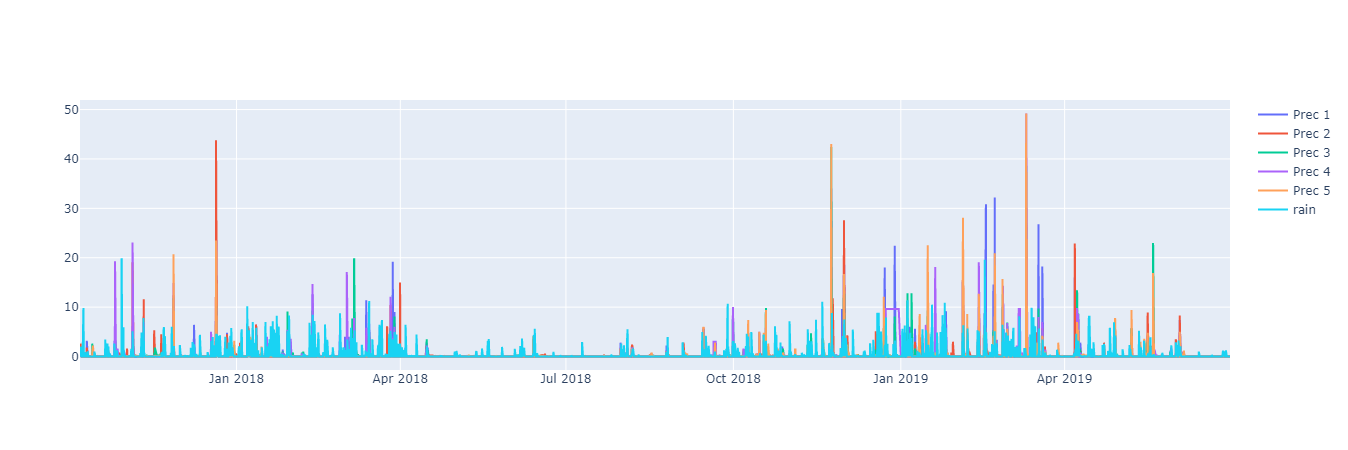

In [102]:
import plotly.express as px
import plotly.graph_objects as go

# fig = px.line(df_slice, x="Data_Hora", y="Precipitacao")
# fig.show()

df_slice = df_m[(~df_m['rain'].isna())]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_slice.loc[df_slice['Local'] == 1, "Data_Hora"], y=df_slice.loc[df_slice['Local'] == 1, "Precipitacao"],
                    mode='lines',
                    name='Prec 1'))
fig.add_trace(go.Scatter(x=df_slice.loc[df_slice['Local'] == 2, "Data_Hora"], y=df_slice.loc[df_slice['Local'] == 2, "Precipitacao"],
                    mode='lines',
                    name='Prec 2'))
fig.add_trace(go.Scatter(x=df_slice.loc[df_slice['Local'] == 3, "Data_Hora"], y=df_slice.loc[df_slice['Local'] == 3, "Precipitacao"],
                    mode='lines',
                    name='Prec 3'))
fig.add_trace(go.Scatter(x=df_slice.loc[df_slice['Local'] == 4, "Data_Hora"], y=df_slice.loc[df_slice['Local'] == 4, "Precipitacao"],
                    mode='lines',
                    name='Prec 4'))
fig.add_trace(go.Scatter(x=df_slice.loc[df_slice['Local'] == 5, "Data_Hora"], y=df_slice.loc[df_slice['Local'] == 5, "Precipitacao"],
                    mode='lines',
                    name='Prec 5'))
fig.add_trace(go.Scatter(x=df_slice.loc[df_slice['Local'] == 5, "Data_Hora"], y=df_slice.loc[df_slice['Local'] == 5, "rain"],
                    mode='lines',
                    name='rain'))

fig.show()

In [95]:
from datetime import datetime, timedelta

In [103]:
df_slice['Data'] = df_slice['Data_Hora'].dt.strftime('%Y-%m-%d')
df_prec_sum = df_slice.groupby(['Data', 'Local']).sum().reset_index()[['Data', 'Local', 'rain']]
df_prec_sum.columns = ['Data', 'Local', 'rain_sum']
df_slice = df_slice.merge(df_prec_sum, on=['Data', 'Local'])

<ipython-input-103-13b12b56b8bd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_owm = 

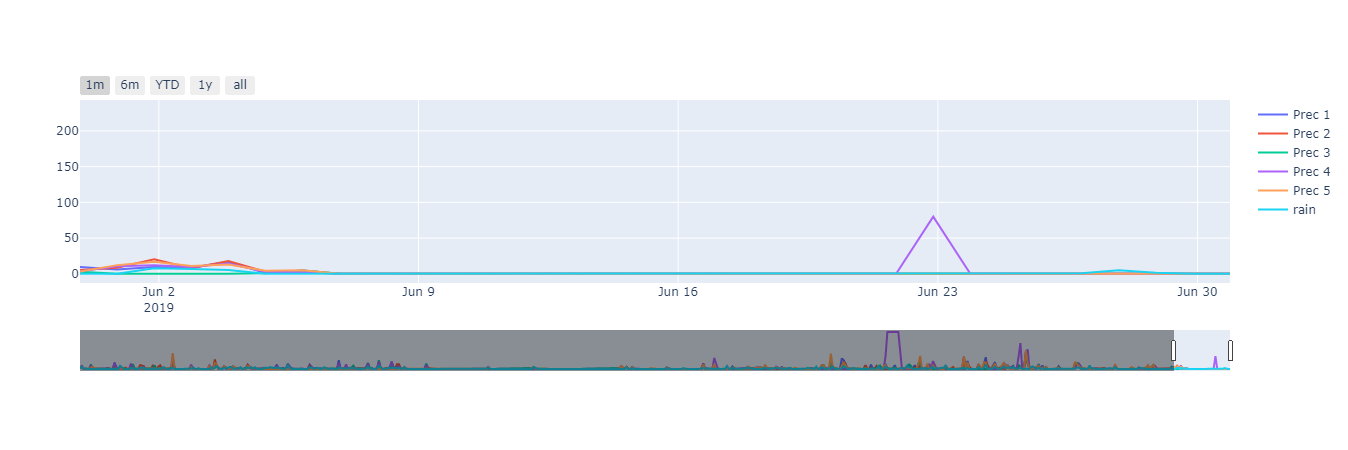

In [109]:
df_slice_2 = df_slice.groupby(['Data', 'Local']).max().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_slice_2.loc[df_slice_2['Local'] == 1, "Data_Hora"], y=df_slice_2.loc[df_slice_2['Local'] == 1, "PrecSum"],
                    mode='lines',
                    name='Prec 1'))
fig.add_trace(go.Scatter(x=df_slice_2.loc[df_slice_2['Local'] == 2, "Data_Hora"], y=df_slice_2.loc[df_slice_2['Local'] == 2, "PrecSum"],
                    mode='lines',
                    name='Prec 2'))
fig.add_trace(go.Scatter(x=df_slice_2.loc[df_slice_2['Local'] == 3, "Data_Hora"], y=df_slice_2.loc[df_slice_2['Local'] == 3, "PrecSum"],
                    mode='lines',
                    name='Prec 3'))
fig.add_trace(go.Scatter(x=df_slice_2.loc[df_slice_2['Local'] == 4, "Data_Hora"], y=df_slice_2.loc[df_slice_2['Local'] == 4, "PrecSum"],
                    mode='lines',
                    name='Prec 4'))
fig.add_trace(go.Scatter(x=df_slice_2.loc[df_slice_2['Local'] == 5, "Data_Hora"], y=df_slice_2.loc[df_slice_2['Local'] == 5, "PrecSum"],
                    mode='lines',
                    name='Prec 5'))
fig.add_trace(go.Scatter(x=df_slice_2.loc[df_slice_2['Local'] == 5, "Data_Hora"], y=df_slice_2.loc[df_slice_2['Local'] == 5, "rain_sum"],
                    mode='lines',
                    name='rain'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [107]:
df.columns

Index(['lat', 'lon', 'forecast dt unixtime', 'forecast dt iso',
       'slice dt unixtime', 'slice dt iso', 'temperature', 'dew_point',
       'pressure', 'ground_pressure', 'humidity', 'clouds', 'wind_speed',
       'wind_deg', 'rain', 'snow', 'ice', 'fr_rain', 'convective',
       'snow_depth', 'accumulated', 'hours', 'rate', 'Data_Hora',
       'Data_Forecast', 'Data_Slice'],
      dtype='object')

# ...

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from plotly import graph_objects as go
import plotly as py

from datetime import datetime
from datetime import timedelta

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

from sklearn.utils import resample

In [2]:
def upsampleData(X, label):
    # Separate true and false
    false_label = X[X[label]==0].copy()
    true_label = X[X[label]==1].copy()
    
    # Upsample true values
    label_upsampled = resample(true_label,
                            replace=True, # sample with replacement
                            n_samples=len(false_label), # match number in majority class
                            random_state=378) # reproducible results
    upsampled = pd.concat([false_label, label_upsampled])
    
    # Separate x and y
    x = upsampled[[c for c in X.columns if label not in c]]
    y = upsampled[label]
    
    return x, y

In [3]:
def trainXGB(df, cols_rem, label, verbose=True):
    xgb = xgboost.XGBClassifier()

    # Separate x and y and remove unnecessary columns
    x = df[[c for c in df.columns if c not in cols_rem]]
    y = df[label]
    
    # Split training and test data
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 378, stratify=y)
    
    # Upsample true values
    X = pd.concat([x_treino, y_treino], axis=1)
    x_treino, y_treino = upsampleData(X, label)

    # XGBClassifier parameters
    param = {'max_depth':50, 'eta':1, 'objective':'binary:logistic', 'min_child_weight': 1, 'lambda': 1, 'alpha': 0, 'gamma': 0}

    # Generate DMatrices with training and test data
    df_train = xgboost.DMatrix(data=x_treino, label=y_treino)
    df_test = xgboost.DMatrix(data=x_teste, label=y_teste)

    # Train model and predict on training and test data
    bst = xgboost.train(param, df_train, 2, feval=f1_score)
    y_teste_pred = bst.predict(xgboost.DMatrix(data=x_teste, label=y_teste))
    y_teste_pred = [1 if i>0.5 else 0 for i in y_teste_pred]
    y_treino_pred = bst.predict(xgboost.DMatrix(data=x_treino, label=y_treino))
    y_treino_pred = [1 if i>0.5 else 0 for i in y_treino_pred]
    
    # Print results if verbose is true
    if verbose:
        print(f"Treino: {accuracy_score(y_treino, y_treino_pred)}")
        print(f"Teste: {accuracy_score(y_teste, y_teste_pred)}")
        print(f"Precisão: {precision_score(y_teste, y_teste_pred)}")
        print(f"Recall: {recall_score(y_teste, y_teste_pred)}")
        print(f"F1: {f1_score(y_teste, y_teste_pred)}")
        display(confusion_matrix(y_teste, y_teste_pred, normalize='true'))
        display(confusion_matrix(y_teste, y_teste_pred,))
        
    # Store results in a dict
    results = {
        'Features': list(x.columns),
        'Train_Acc': accuracy_score(y_treino, y_treino_pred),
        'Test_Acc': accuracy_score(y_teste, y_teste_pred),
        'Precision': precision_score(y_teste, y_teste_pred),
        'Recall': recall_score(y_teste, y_teste_pred),
        'F1': f1_score(y_teste, y_teste_pred),
        'Ver_Pos': confusion_matrix(y_teste, y_teste_pred, normalize='true')[1,1]
    }
    
    return bst, results, y_treino_pred, y_teste_pred

In [13]:
df_p = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/prepped_data.csv', sep=';')
df_p.groupby('Label').count()

,Data_Hora,Mes,Dia,Local,Precipitacao,PrecSum
Label,,,,,,
0.0,359227,359227,359227,359227,359227,359227
1.0,6798,6798,6798,6798,6798,6798


In [14]:
df_p = df_p.sort_values(['Data_Hora', 'Local'])
#df_p['Label'] = df_p['Label'].shift(-5*6, fill_value = 0)

In [15]:
# Parameters
label = 'Label'
cols_rem = ['LocalMax', 'Label', 'Label_Old', 'Cluster', 'Data', 'Hora', 'Data_Hora', 'Ordens', 'Minuto'] + [c for c in df_p.columns if 'Hora_' in c]
# Result set
prepped_models = {}

for l in range(6):
    if l != 0:
        df_train = df_p[df_p['Local'] == l]
    else:
        df_train = df_p.copy()
        
    print(f'----- LOCAL {l} -----')
    model, training_res, y_treino_pred, y_teste_pred = trainXGB(df_train, cols_rem, label)
    
    prepped_models[l] = {
        'model': model,
        'results': training_res,
        'y_treino': y_treino_pred,
        'y_teste': y_teste_pred
    }

----- LOCAL 0 -----
Treino: 0.9997236118954259
Teste: 0.9995173393559668
Precisão: 0.9778633301251203
Recall: 0.9965669445806769
F1: 0.9871265484576148


array([[9.99573161e-01, 4.26838887e-04],
       [3.43305542e-03, 9.96566945e-01]])

array([[107723,     46],
       [     7,   2032]], dtype=int64)

----- LOCAL 1 -----
Treino: 0.999791007344599
Teste: 0.9994080684819233
Precisão: 0.9837209302325581
Recall: 0.986013986013986
F1: 0.9848661233993015


array([[9.99674918e-01, 3.25082432e-04],
       [1.39860140e-02, 9.86013986e-01]])

array([[21526,     7],
       [    6,   423]], dtype=int64)

----- LOCAL 2 -----
Treino: 1.0
Teste: 1.0
Precisão: 1.0
Recall: 1.0
F1: 1.0


array([[1., 0.],
       [0., 1.]])

array([[21568,     0],
       [    0,   394]], dtype=int64)

----- LOCAL 3 -----
Treino: 1.0
Teste: 1.0
Precisão: 1.0
Recall: 1.0
F1: 1.0


array([[1., 0.],
       [0., 1.]])

array([[21590,     0],
       [    0,   372]], dtype=int64)

----- LOCAL 4 -----
Treino: 0.9997609942638623
Teste: 0.9989072033512431
Precisão: 0.9487179487179487
Recall: 1.0
F1: 0.9736842105263158


array([[0.99888465, 0.00111535],
       [0.        , 1.        ]])

array([[21494,    24],
       [    0,   444]], dtype=int64)

----- LOCAL 5 -----
Treino: 1.0
Teste: 0.999772334031509
Precisão: 0.9974874371859297
Recall: 0.9900249376558603
F1: 0.9937421777221527


array([[9.99953620e-01, 4.63800380e-05],
       [9.97506234e-03, 9.90024938e-01]])

array([[21560,     1],
       [    4,   397]], dtype=int64)

In [17]:
df_owm['Data'] = df_owm['Data_Slice'].dt.strftime('%Y-%m-%d')
df_owm_grouped = df_owm.groupby('Data').sum().reset_index()[['Data', 'rain']]

<ipython-input-17-0d4622152f3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_owm['Data'] = df_owm['Data_Slice'].dt.strftime('%Y-%m-%d')


In [23]:
df_p['Data_Hora'] = pd.to_datetime(df_p['Data_Hora'], yearfirst=True)
df_p['Data'] = df_p['Data_Hora'].dt.strftime('%Y-%m-%d')

In [25]:
df = df_p.merge(df_owm_grouped, on='Data').rename(columns={'PrecSum': 'PrecSumOld', 'rain': 'PrecSum'})

In [31]:
prepped_models[0]['results']['Features']

['Mes', 'Dia', 'Local', 'Precipitacao', 'PrecSum']

In [32]:
label_pred = prepped_models[0]['model'].predict(xgboost.DMatrix(data=df[prepped_models[0]['results']['Features']]))
df['Label_pred'] = [1 if i>0.5 else 0 for i in label_pred]

In [36]:
df.columns

Index(['Data_Hora', 'Mes', 'Dia', 'Local', 'Precipitacao', 'PrecSumOld',
       'Label', 'Data', 'PrecSum', 'Label_pred'],
      dtype='object')

In [37]:
df.loc[df['Label'] == 1, ['Local', 'Data_Hora', 'Precipitacao', 'PrecSum', 'PrecSumOld', 'Label', 'Label_pred']].sort_values(by=['Local', 'Data_Hora']
).to_csv('../../../data/analysis/labels_prediction_owm_forecast.csv', index=False, sep=';', decimal=',')

In [41]:
print(df[(df['Label'] == df['Label_pred']) & (df['Label'] == 1)].shape)
print(df[df['Label'] == 1].shape)

(96, 10)
(1439, 10)
